# 客户信用风险预测

## 一、 任务描述与分析
### 一、数据集描述

我们选择的数据集包含了1000个样本，每个样本有20个属性和1个类别标签。属性包括了贷款人的个人信息、贷款的金额、期限、目的、信用历史等，类别标签表示贷款人的信用风险等级。  
下表为客户信用风险数据包含的各类属性及其含义

|属性名称|	含义|
|   :----- |  :----- |
|hecking_status|	支票账户的状态，无账户、余额低于200欧元，余额高于200欧元。|
|duration|	贷款的期限，以月为单位。|
|credit_history|	贷款人的信用历史，如无信用记录，所有贷款已还清，有贷款正在还，有逾期记录，或有严重违约记录。|
|purpose|	贷款的目的，如购买汽车，家具，电器，教育，或其他。|
|credit_amount|	贷款的金额，以欧元为单位。|
|savings_status|	储蓄账户的状态，如无账户，余额低于100欧元，余额在100-500欧元之间，余额在500-1000欧元之间，或余额高于1000欧元。|
|employmen|	就业状况，如失业或低于一年，一年到四年，四年到七年，或超过七年。|
|installment_commitment|	每月还款占可支配收入的百分比。|
|personal_statu|	个人状态，如性别和婚姻状况。|
|other_parties|	是否有其他担保人或共同借款人。|
|residence_since|	在当前住址居住的时间，以年为单位。|
|property_magnitude	|拥有的财产类型，如无财产，汽车，房屋，或其他。|
|age|	贷款人的年龄，以年为单位。|
|other_payment_plans	|是否有其他还款计划或债务。|
|housing	|住房状况，如租房，自有房屋，或免费住房。|
|existing_credits	|已有的信用卡或贷款数量。|
|job	|职业类型，如无技能或半技能工人，技能工人或员工，管理者或自雇人士等。|
|num_dependents	|负担的家属数量。|
|own_telephone	|是否拥有固定电话。|
|foreign_worke	|是否是外国工作者。|
|class	|信用风险等级，如好（无违约风险）或坏（有违约风险）。|


### 二、任务

将这个数据集用于训练和测试信用风险模型，预测贷款人的信用风险。这是一个二分类任务，最终模型输出的结果是将贷款人的信用分类为good或bad。

### 三、目标函数

项目最终使用的模型是梯度提升树（Gradient Boosting Classifier），它是一种集成学习的方法，通过组合多个弱分类器来构建一个强分类器。梯度提升树的基本思想是在每一轮迭代中，根据损失函数的负梯度来拟合一个新的分类器，并将其加入到现有的分类器中，从而不断提升模型的预测能力。

梯度提升树可以优化任意可微分的损失函数，模型选用的损失函数是对数损失。

对数损失，也称为交叉熵损失，适用于二分类或多分类问题，对数损失的公式：
$L(y,p)=-\sum_{i=1}^N\sum_{j=1}^Ky_{ij}logp_{ij}$

其中，N是样本数量，K是类别数量，$y_{ij}$是一个二值指标，表示第i个样本是否属于第j个类别，$p_{ij}$是模型预测第i个样本属于第j个类别的概率。
对数损失的含义为若模型预测的概率值和真实标签一致，那么对数损失趋近于0，如果模型预测的概率值和真实标签相反，那么对数损失趋近于无穷大。因此，对数损失可以反映模型的分类效果和置信度，越小越好。

## 二、数据可视化及统计分析
### 一、原数据集的可视化

下图展示了原数据的信息。

In [91]:
import pandas as pd
import numpy as np
credit=pd.read_csv("./credit_customers.csv")
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


下图展示了原数据的20个属性及标签名称，可以看到原始数据集不存在缺失值和重复值。

In [92]:
credit.info()
print("重复的数据行数：",credit.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [93]:
# 查看数据集中是否有缺失值
print(credit.isnull().any())

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

下图为原始数据以属性duration 和 credit amount 作为坐标轴绘制的散点图。

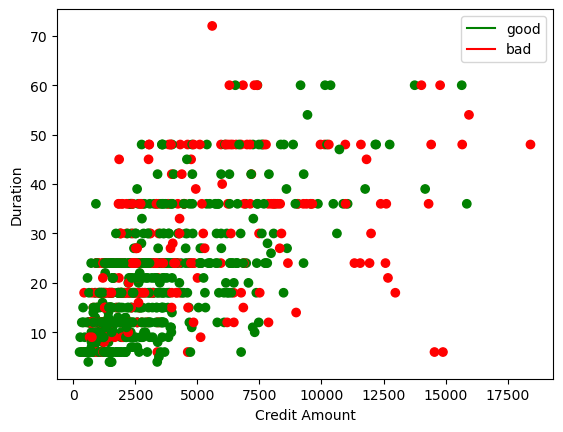

In [95]:
x_c = credit['credit_amount']
y_c = credit['duration']
c = credit['class']
color_dict = {'bad': 'red', 'good': 'green'}

scatter = plt.scatter(x_c, y_c, color=c.apply(color_dict.get), label=c)

plt.xlabel('Credit Amount')
plt.ylabel('Duration')

handle =[ plt.Line2D([0],[0],color='g',label='good'),plt.Line2D([0],[0],color='r',label='bad')]
plt.legend(handles = handle)
plt.show()

### 二、原数据集的统计分析

#### 一、 描述性统计图
下图为原数据集的描述性统计表，可以观察到数值型数据的分布不一致需要对数值型数据进行标准化，并且需要对类别型数据进行编码处理。

In [96]:
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## 三、特征工程

特征工程是指将原始数据转化为更适合机器学习模型的特征的过程，它可以提高模型的性能和泛化能力。在进行分类任务模型训练的时候，为了改善数据质量、让数据适应算法的要求，需要对数据进行数据预处理，处理异常值、数据格式等问题，提高数据的标准性、唯一性、有效性、正确性和一致性。在下面的特征工程中，通过特征编码对数据进行转换，可以将定性特征转换为定量特征，满足机器学习算法对模型的输入要求。同时也可以生成一些新的特征，增加了数据中的有效信息，提高了模型的表达能力和预测能力。

### 一、 数据转换

观察原数据发现存在类别型数据，需要对类别型数据进行编码：首先观察各个类别型数据的具体类别，并统计类别的占比。

In [97]:
# 统计每个类别变量的比例
for var in credit.select_dtypes(include=['object']).columns:
    # 使用value_counts函数计算每个类别的频数
    frequency = credit.select_dtypes(include=['object'])[var].value_counts()
    # 计算总的观测数量
    total_count = frequency.sum()
    # 计算每个类别的比例
    proportions = frequency / total_count
    # 打印结果
    print("Variable:", var)
    print(proportions)
    print("----------------------------------------")

Variable: checking_status
no checking    0.394
<0             0.274
0<=X<200       0.269
>=200          0.063
Name: checking_status, dtype: float64
----------------------------------------
Variable: credit_history
existing paid                     0.530
critical/other existing credit    0.293
delayed previously                0.088
all paid                          0.049
no credits/all paid               0.040
Name: credit_history, dtype: float64
----------------------------------------
Variable: purpose
radio/tv               0.280
new car                0.234
furniture/equipment    0.181
used car               0.103
business               0.097
education              0.050
repairs                0.022
domestic appliance     0.012
other                  0.012
retraining             0.009
Name: purpose, dtype: float64
----------------------------------------
Variable: savings_status
<100                0.603
no known savings    0.183
100<=X<500          0.103
500<=X<1000         0.063


根据得到的结果（下上图），选择以下无序的类别变量进行独热编码。无序变量：purpose、personal_status、other_parties、property_magnitude。

In [98]:
data=pd.get_dummies(credit,columns=['purpose', 'personal_status',"other_parties","property_magnitude"])

但是为了避免维数灾难，不能对所有变量进行独热编码，因此对以下有序且只有两种类别的分类变量进行自定义编码。
自定义编码分类变量为： checking_status、credit_history、savings_status、employment、other_payment_plans、housing、job、own_telephone、foreign_worker、class。

In [99]:
cols = ['checking_status','credit_history', 'savings_status', 'employment', 'other_payment_plans','housing', 
        'job','own_telephone','foreign_worker','class']
# 映射字典
col_dicts = {}
col_dicts = {
  'checking_status': {
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
  },
             
  'credit_history': {
      'existing paid': 0,
      'critical/other existing credit': 1,
      'delayed previously': 2,
      'all paid': 3,
      'no credits/all paid': 4
  },

'savings_status': {
      'no known savings': 0,
      '<100': 1,
      '100<=X<500': 2,
      '500<=X<1000': 3,
      '>=1000': 4
  },

 'employment': {
  'unemployed': 0,
  '<1': 1,
  '1<=X<4': 2,
  '4<=X<7': 3,
  '>=7': 4
  },

'other_payment_plans':{
    'none':0,
    'bank':1,
    'stores':2
},
      
 'housing': {'for free': 0, 'rent': 1, 'own': 2},

 'job': {
  'unemp/unskilled non res': 0,
  'unskilled resident': 1,
  'skilled': 2,
  'high qualif/self emp/mgmt': 3
  },

  'own_telephone': {'none': 0, 'yes': 1},

  'foreign_worker': {'no': 1, 'yes': 0},

  'class': {'bad': 0, 'good': 1}
 }


for col in cols:
    data[col] = credit[col].map(lambda x: x.strip())
    data[col] = credit[col].map(col_dicts[col])

下图编码后数据的数据。

In [100]:
# 打印编码后的数据集
data

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
0,1,6,1,1169,0,4,4,4,67,0,...,0,0,1,0,0,1,0,0,0,1
1,2,48,0,5951,1,2,2,2,22,0,...,0,0,0,0,0,1,0,0,0,1
2,0,12,1,2096,1,3,2,3,49,0,...,0,0,1,0,0,1,0,0,0,1
3,1,42,0,7882,1,3,2,4,45,0,...,0,0,1,0,1,0,0,1,0,0
4,1,24,2,4870,1,2,3,4,53,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,0,1736,1,3,3,4,31,0,...,0,0,0,0,0,1,0,0,0,1
996,1,30,0,3857,1,2,4,4,40,0,...,1,0,0,0,0,1,0,1,0,0
997,0,12,0,804,1,4,4,4,38,0,...,0,0,1,0,0,1,1,0,0,0
998,1,45,0,1845,1,2,4,4,23,0,...,0,0,1,0,0,1,0,0,1,0


In [101]:
# 设特征集和目标变量
y = data["class"]
feature_vars = data.drop('class', axis=1).columns
X = data[feature_vars]

下图是编码后数据的描述性统计图。

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 输出描述统计表
data.describe()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.001000,20.903000,0.776000,3271.258000,1.190000,2.384000,2.973000,2.845000,35.546000,0.233000,...,0.050000,0.092000,0.54800,0.041000,0.052000,0.907000,0.332000,0.23200,0.154000,0.282000
std,0.957034,12.058814,1.060636,2822.736876,0.966869,1.208306,1.118715,1.103718,11.375469,0.522479,...,0.218054,0.289171,0.49794,0.198389,0.222138,0.290578,0.471167,0.42232,0.361129,0.450198
min,0.000000,4.000000,0.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,1365.500000,1.000000,2.000000,2.000000,2.000000,27.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,18.000000,0.000000,2319.500000,1.000000,2.000000,3.000000,3.000000,33.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,24.000000,1.000000,3972.250000,1.000000,4.000000,4.000000,4.000000,42.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000
max,3.000000,72.000000,4.000000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,2.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [103]:
numeric_vars = ['duration', 'credit_amount', 'installment_commitment','residence_since','age','existing_credits','num_dependents']  # 数值型变量

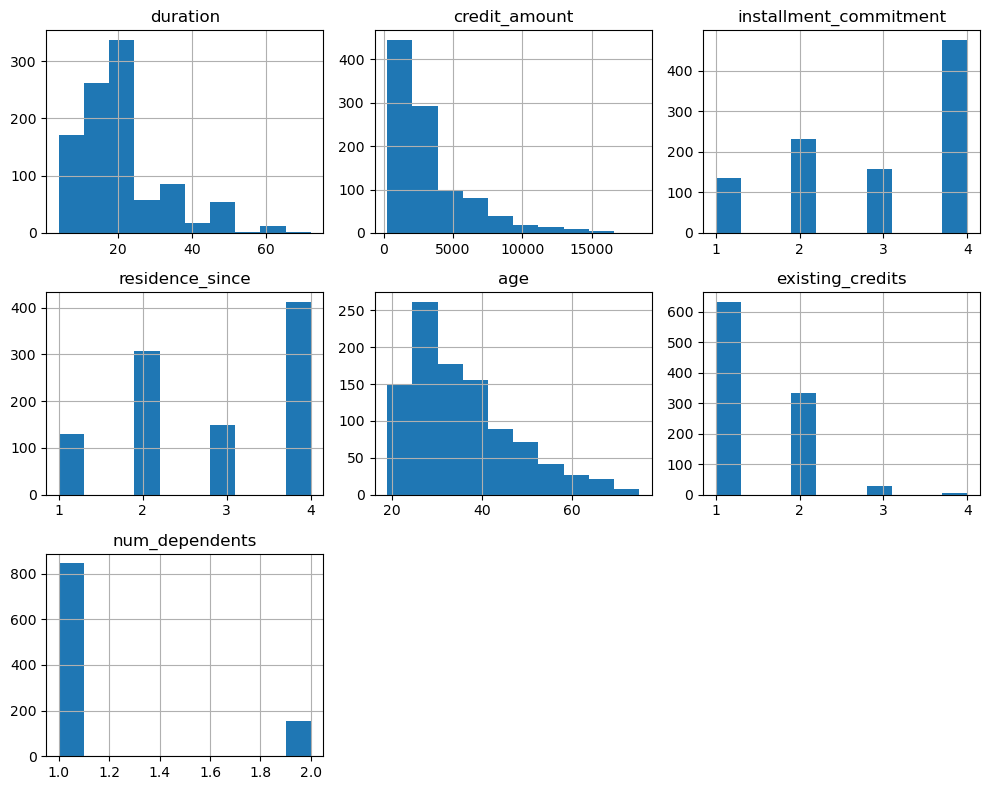

In [104]:
# 直方图
# 选择前几列变量，剔除独热编码的变量
data[numeric_vars].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

上图为编码后数据的直方图，可以看到数据在各个属性上的分布，可以看到分布并不均匀，需要对原数据进行标准化，下图为标准化后的数据集。

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 对数据进行标准化

data_to_normalize = data[numeric_vars]

normalized_data = scaler.fit_transform(data_to_normalize)

# 将标准化后的数据更新回原始数据框中的对应列
data[numeric_vars] = normalized_data
data


,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
0,1,-1.236478,1,-0.745131,0,4,0.918477,1.046987,2.766456,0,...,0,0,1,0,0,1,0,0,0,1
1,2,2.248194,0,0.949817,1,2,-0.870183,-0.765977,-1.191404,0,...,0,0,0,0,0,1,0,0,0,1
2,0,-0.738668,1,-0.416562,1,3,-0.870183,0.140505,1.183312,0,...,0,0,1,0,0,1,0,0,0,1
3,1,1.750384,0,1.634247,1,3,-0.870183,1.046987,0.831502,0,...,0,0,1,0,1,0,0,1,0,0
4,1,0.256953,2,0.566664,1,2,0.024147,1.046987,1.535122,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,-0.738668,0,-0.544162,1,3,0.024147,1.046987,-0.399832,0,...,0,0,0,0,0,1,0,0,0,1
996,1,0.754763,0,0.207612,1,2,0.918477,1.046987,0.391740,0,...,1,0,0,0,0,1,0,1,0,0
997,0,-0.738668,0,-0.874503,1,4,0.918477,1.046987,0.215835,0,...,0,0,1,0,0,1,1,0,0,0
998,1,1.999289,0,-0.505528,1,2,0.918477,1.046987,-1.103451,0,...,0,0,1,0,0,1,0,0,1,0


### 二、箱线图分析
筛选数值型特征绘制箱线图如下：

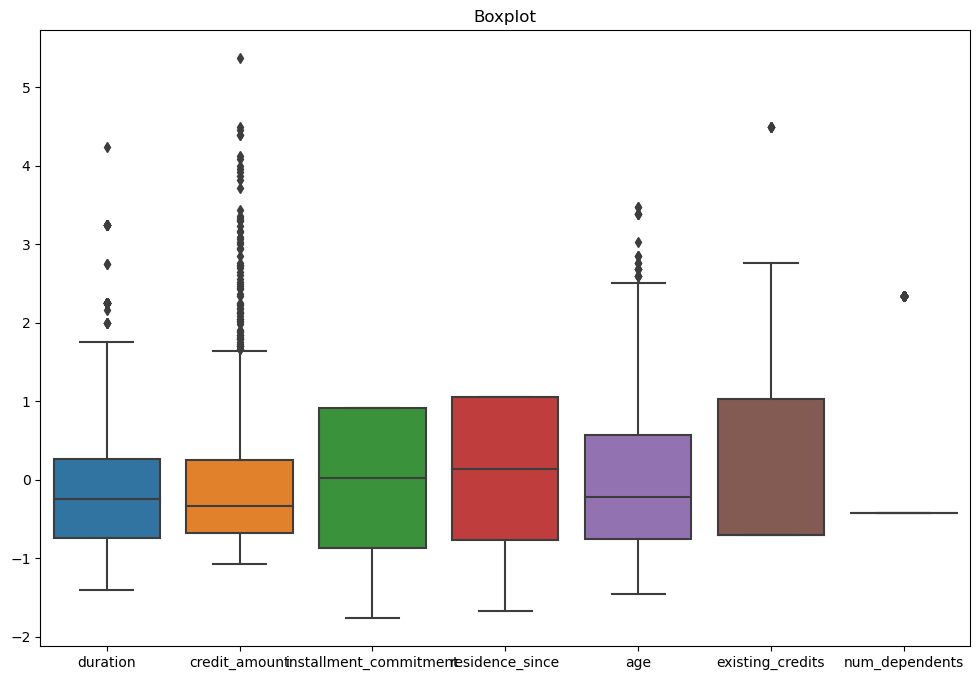

In [106]:
# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_vars])
plt.title("Boxplot")
plt.show()

观察发现特征credit-amount存在较多的离群值，我们试图探究该离群情况是否与客户信用的类型相关。
首先对credit-amount列数据创建分箱区间，进行分组统计，计算各分箱区间的频数，进而计算每个区间内信用分类“class”为好和坏的百分比。
结果如下，可以看出在credit_amount较小的客户群体中，信用差的比例较低，随着credit_amount的增长，信用差的客户比例逐渐提升，说明该特征与客户信用好坏有较明显的关系，应重点关注。

In [107]:
# 创建分箱区间
bins = pd.cut(data['credit_amount'], bins=5)

# 将数据分箱并添加新列
data['credit_amount_bin'] = bins
# 分组统计并计算频数
freq = data.groupby(['credit_amount_bin', 'class']).size().unstack()
freq.columns.name = None  # 清除列名的索引名称

# 计算每个分组内部的百分比
percent = freq.div(freq.sum(axis=1), axis=0) * 100
percent.columns.name = None  # 清除列名的索引名称

# 合并结果
result = pd.concat([freq, percent], axis=1)
print(result)

                     0    1          0          1
credit_amount_bin                                
(-1.077, 0.217]    189  549  25.609756  74.390244
(0.217, 1.506]      68  109  38.418079  61.581921
(1.506, 2.794]      23   34  40.350877  59.649123
(2.794, 4.082]      16    6  72.727273  27.272727
(4.082, 5.371]       4    2  66.666667  33.333333


### 三、 相关性分析

下图是编码后数据的相关系数矩阵图。

In [108]:
# 计算数值型变量与分类目标变量之间的相关系数（皮尔逊相关系数）
correlation_matrix = data[numeric_vars + ["class"]].corr()
# 相关系数矩阵
correlation_matrix

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.214927
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.154739
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.072404
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.045732
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.003015
class,-0.214927,-0.154739,-0.072404,-0.002967,0.091127,0.045732,0.003015,1.000000


为更直观地展现数值型变量与分类变量之间的相关性，绘制热力图。

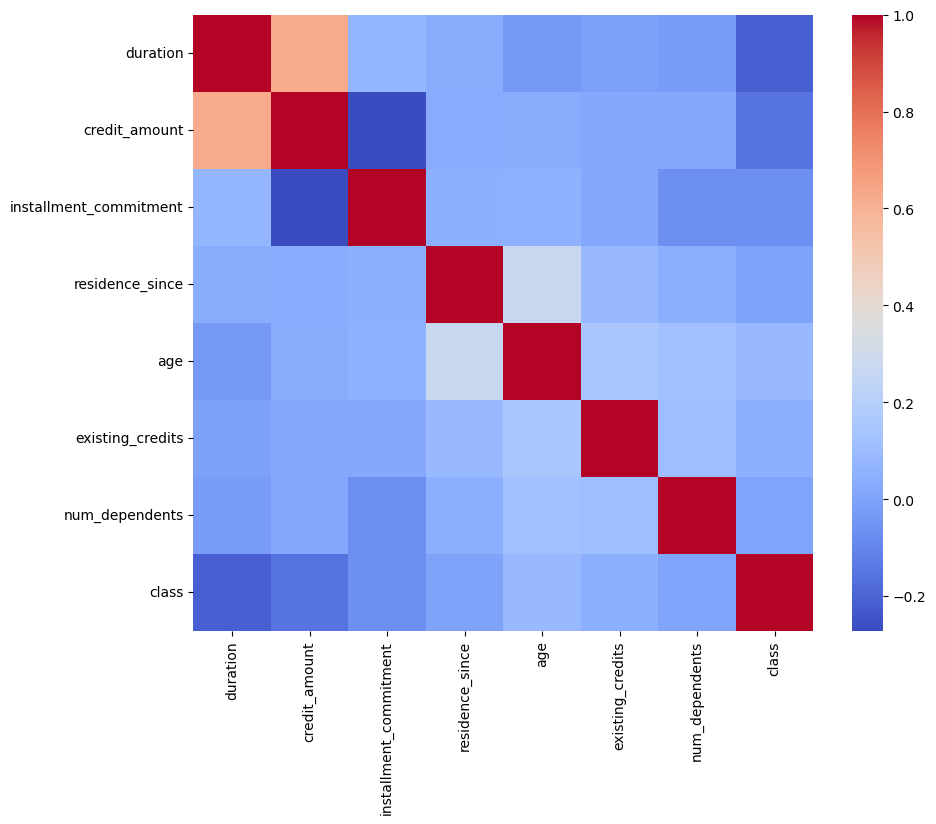

In [109]:
# 热力图
correlation_matrix = data[numeric_vars + ["class"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=None, cmap='coolwarm')
plt.show()


可以直观地看到变量和class没有强相关性，其中duration和credit_amount是两个与class最相关的特征，它们的相关系数分别为-0.214927和-0.154739，说明它们与class呈负相关，即贷款期限和贷款金额越大，还款能力越差，这和人们的常识相符合。

我们还尝试对类别型数据和分类目标变量进行卡方统计检验，结果显示，P值不显著。

In [110]:
from scipy.stats import chi2_contingency
data.columns
data2 = data
data2=data2.loc[:, ~data.columns.isin (numeric_vars)]

chi2_data = np.array(data2.iloc[1: , :-1])
chi2_data
chi2 = chi2_contingency(chi2_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%chi2)

chisq-statistic=24359.0477, p-value=1.0000, df=29940 expected_frep=[[0.91433394 0.70860881 1.08805739 ... 0.21212547 0.14080743 0.25692784]
 [0.91433394 0.70860881 1.08805739 ... 0.21212547 0.14080743 0.25692784]
 [0.84400056 0.65410044 1.00436067 ... 0.19580813 0.12997609 0.23716416]
 ...
 [0.98466732 0.76311718 1.17175411 ... 0.22844282 0.15163877 0.27669152]
 [0.77366718 0.59959207 0.92066395 ... 0.17949079 0.11914475 0.21740048]
 [0.98466732 0.76311718 1.17175411 ... 0.22844282 0.15163877 0.27669152]]


综上，只凭相关性分析无法得到对于模型重要的特征，还需进一步分析，尝试计算属性和class之间的互信息。

### 四、互信息分析

互信息是一种衡量两个变量之间相关性的指标，它表示了一个变量包含另一个变量信息的程度。互信息越大，说明两个变量越相关，互信息为0，说明两个变量相互独立。互信息对特征构成的作用主要如下：

（1）如果一个特征和目标变量的互信息很大，那么这个特征可能对预测目标变量有很大的贡献，可以作为一个重要的特征。

（2）如果一个特征和目标变量的互信息很小，那么这个特征可能对预测目标变量没有太大的影响，可以考虑删除或者降低其权重。

（3）如果两个特征和目标变量的互信息都不大，但是它们之间又存在一定的互信息，那么它们可能存在一些非线性的交互效应，可以考虑构造一个新的特征来表示它们的组合。

In [111]:
from sklearn.feature_selection import mutual_info_classif
# 计算特征和目标的互信息
mutual_info = mutual_info_classif(data[X.columns.tolist()],data["class"])
selected_features=[]
print("\nMutual Information:")
for i, info in enumerate(sorted(mutual_info,reverse=True)):
    if info > 0:
        print(f"{X.columns[i]}: {info}")
        selected_features.append(f'{X.columns[i]}')
selected_features
print()
print('互信息不为0的属性个数为：',len(selected_features))


Mutual Information:
checking_status: 0.06829483270293979
duration: 0.04410987441583458
credit_history: 0.037302256711735815
credit_amount: 0.03286699268692295
savings_status: 0.02707033346857446
employment: 0.02670793286981632
installment_commitment: 0.024323503170824434
residence_since: 0.019623524197581732
age: 0.01950924658579911
other_payment_plans: 0.018747404488666408
housing: 0.018120651888727135
existing_credits: 0.016910732800513584
job: 0.015779237437556937
num_dependents: 0.01569202729885366
own_telephone: 0.012759542241626898
foreign_worker: 0.012639897824802349
purpose_business: 0.011782279164116005
purpose_domestic appliance: 0.01079819997860687
purpose_education: 0.009432157086506798
purpose_furniture/equipment: 0.00939430095273086
purpose_new car: 0.006238963263622166
purpose_other: 0.004695370328037685
purpose_radio/tv: 0.004348198974055029
purpose_repairs: 0.003740706374470326
purpose_retraining: 0.0018872754575518513
purpose_used car: 0.0012685888750563201
personal_

上图图显示了一个各个属性与class的互信息不为0的集合，可以看到checking_status和duration是两个与class最相关的特征，它们的互信息分别为0.0504260268800516和0.05037024403999246，说明它们包含了目标变量的较多信息，可以作为重要的特征。

## 四、模型训练

### 一、划分数据集

首先将上述经过编码以及互信息筛选后的数据子集作为待划分数据集，并按1:9的比例划分为测试集和训练集。

In [112]:
from sklearn.model_selection import train_test_split
# 先将X设为互信息不为0的特征子集
X=X[selected_features]
# 将数据集分为0.9的训练集和0.1的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 打印各个数据集的形状
print(X_train.shape)
print(X_test.shape)

(900, 27)
(100, 27)


### 二、 模型训练与评估
首先对模型进行权重调整，用平衡数据的不均衡性。代码中使用了两种权重方案，一种是1:1，即不做调整；另一种是0.84:1，即给少数类别的样本更高的权重。


接着对六种不同的机器学习算法进行训练和评估，模型分别是：SVC、决策树、极度随机树、逻辑回归、随机森林和梯度提升树。对于每种算法，代码中使用了两种权重方案进行训练，并用测试集进行预测，使用准确率和F1两种指标对预测结果进行评估。。


**性能指标**

- 准确率 accuracy   
- AUC

**类别不平衡处理**

根据前面对类别变量的类比占比统计结果，可以看到目标变量中good与bad的比例为**7：3**，训练数据存在不平衡，由于在实际应用中将信用不好的客户判断为好，可能带来较大的损失，应更关注较少数的信用不好的情况。

因此，我们在模型拟合过程中对样本权重进行调整，将信用好的样本权重设为**0.84**，信用不好的样本权重设为**1**，这是一种正则化的方法，可以改变损失函数或评估指标对不同样本的敏感度，从而影响模型参数的更新方向和幅度。

另外，也使得模型将更加关注信用不好的样本情况，从而提高模型性能。

In [113]:
# 导入相关模型的包
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV

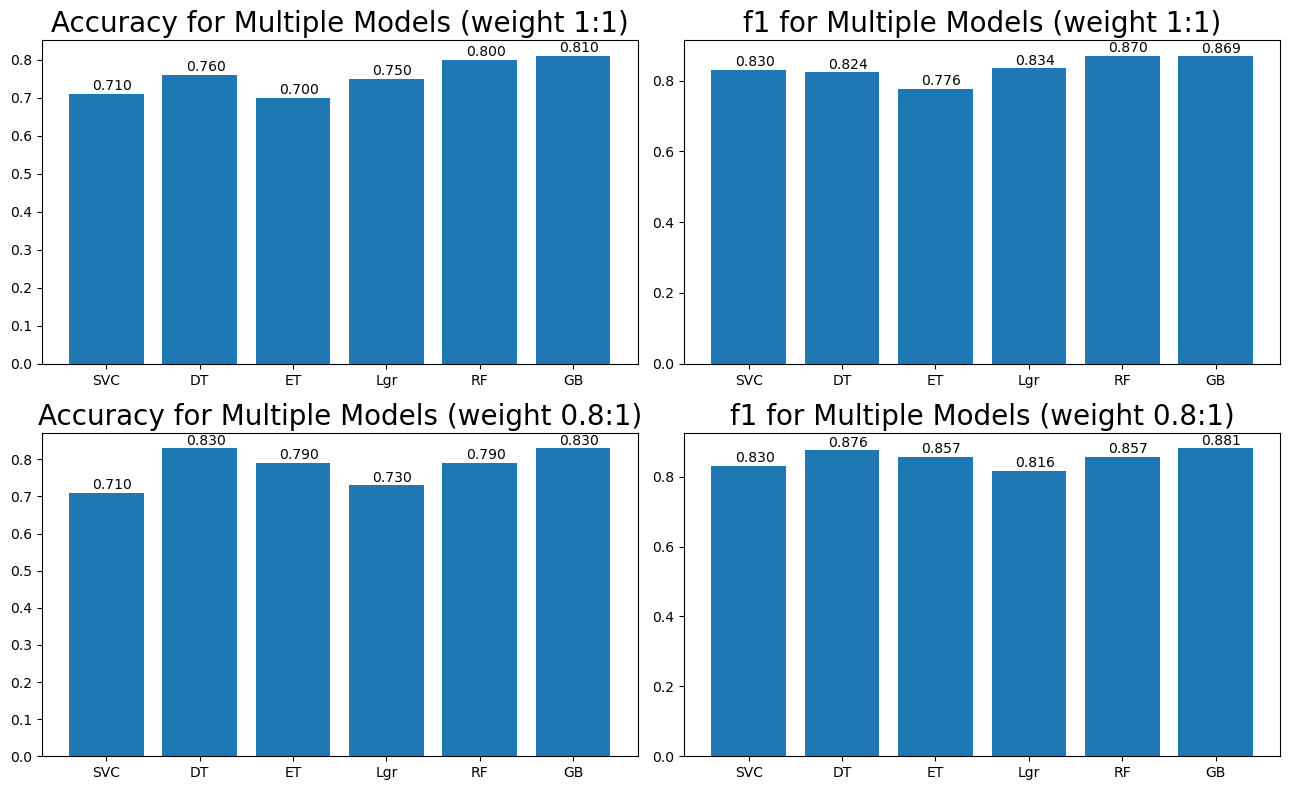

<function matplotlib.pyplot.show(close=None, block=None)>

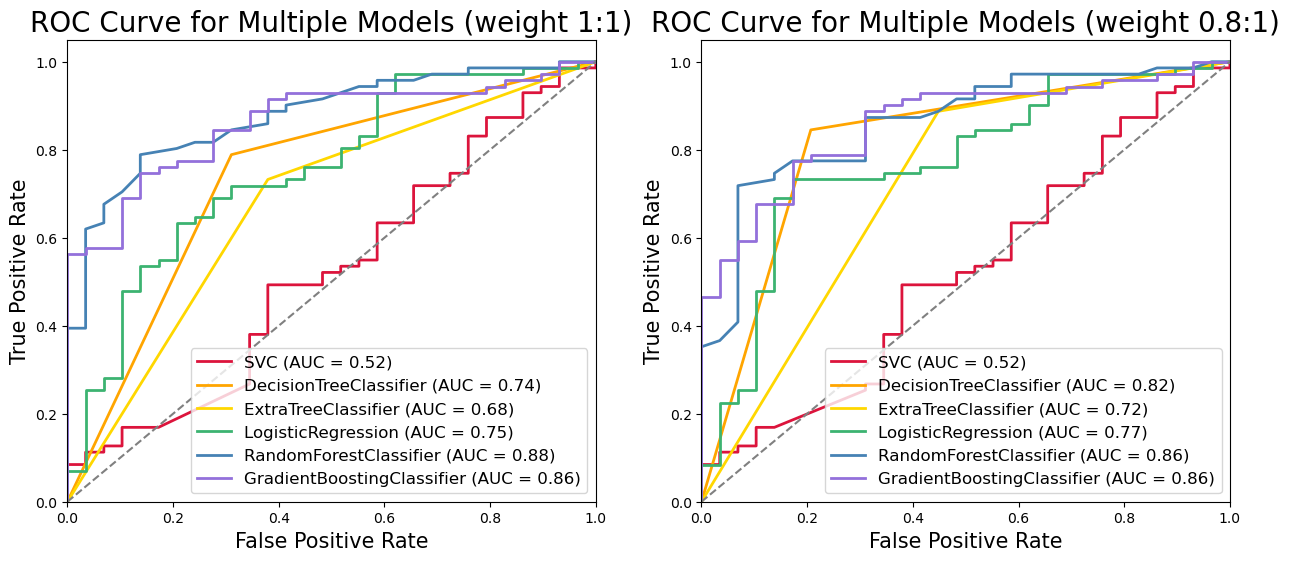

In [114]:
# 对模型进行权重调整
class_weight = {1:1, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
models = [SVC(gamma='auto', probability=True),DecisionTreeClassifier(), 
          ExtraTreeClassifier(), LogisticRegression(), RandomForestClassifier(), 
          GradientBoostingClassifier()]
# 训练每个算法模型并进行预测
accuracies = []
f1s=[]
for model in models:
    model.fit(X_train, y_train,sample_weight=sample_weight_vect)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    f1 = f1_score(y_test, y_pred)
    f1s.append(f1)

plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
plt.bar(range(len(models)), accuracies)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('Accuracy for Multiple Models (weight 1:1)', fontsize=20)
# 在每个直方上方添加文本标签，显示高度
for x, y in enumerate(accuracies):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)

plt.subplot(2,2,2)
plt.bar(range(len(models)), f1s)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('f1 for Multiple Models (weight 1:1)', fontsize=20)
for x, y in enumerate(f1s):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)
# 调整子图之间的间距
plt.tight_layout()
# 对模型进行权重调整
class_weight = {1:0.84, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
models1 = [SVC(gamma='auto', probability=True),DecisionTreeClassifier(), ExtraTreeClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
# 训练每个算法模型并进行预测
accuracies1 = []
f1s1=[]
for model in models1:
    model.fit(X_train, y_train,sample_weight=sample_weight_vect)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies1.append(accuracy)
    f1 = f1_score(y_test, y_pred)
    f1s1.append(f1)
    # print(model,':',accuracy)

# 绘制准确率直方图
plt.subplot(2,2,3)
plt.bar(range(len(models1)), accuracies1)
plt.xticks(range(len(models1)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('Accuracy for Multiple Models (weight 0.8:1)', fontsize=20)
for x, y in enumerate(accuracies1):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)


plt.subplot(2,2,4)
plt.bar(range(len(models)), f1s1)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('f1 for Multiple Models (weight 0.8:1)', fontsize=20)
for x, y in enumerate(f1s1):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)

# 调整子图之间的间距
plt.tight_layout()
plt.show()

# 创建新画布绘制每个模型的roc曲线
plt.figure(figsize=(15,6), dpi=100)
plt.subplot(1,2,1)
colors = ['crimson', 'orange', 'gold', 'mediumseagreen', 'steelblue', 'mediumpurple']
for model, color in zip(models, colors):
    y_score = model.predict_proba(X_test)[:, 1] # 获取预测概率
    fpr, tpr, thresholds = roc_curve(y_test, y_score) # 计算fpr和tpr
    auc_value = auc(fpr, tpr) # 计算auc值
    plt.plot(fpr, tpr, lw=2, label=model.__class__.__name__ + ' (AUC = %.2f)' % auc_value, color=color) # 绘制roc曲线并设置标签
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Multiple Models (weight 1:1)', fontsize=20)
plt.legend(loc='lower right', fontsize=12)

# 创建新画布绘制每个模型的roc曲线
plt.subplot(1,2,2)
colors = ['crimson', 'orange', 'gold', 'mediumseagreen', 'steelblue', 'mediumpurple']
for model, color in zip(models1, colors):
    y_score = model.predict_proba(X_test)[:, 1] # 获取预测概率
    fpr, tpr, thresholds = roc_curve(y_test, y_score) # 计算fpr和tpr
    auc_value = auc(fpr, tpr) # 计算auc值
    plt.plot(fpr, tpr, lw=2, label=model.__class__.__name__ + ' (AUC = %.2f)' % auc_value, color=color) # 绘制roc曲线并设置标签
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Multiple Models (weight 0.8:1)', fontsize=20)
plt.legend(loc='lower right', fontsize=12)
plt.show
# 保存或显示图像
# plt.savefig('roc.png')

图（上）显示了两种权重方案下的六种算法模型在准确率和F1上的表现。从图中可以看出，权重调整对于不同的算法模型有不同的影响，有些模型在权重调整后表现得更好，有些则表现得更差。例如，SVC和逻辑回归在权重调整后准确率和F1都有所提高，而决策树和极度随机树则有所降低。另外，可以看出梯度提升树是表现最好的模型，无论是准确率还是F1分数都是最高的。


图（下）中的ROC曲线显示了两种权重方案下的六种算法模型在不同阈值下的真正例率和假正例率，以及它们的AUC值。从图中可以看出，权重调整对于不同的算法模型也有不同的影响，有些模型在权重调整后ROC曲线更靠近左上角，有些则更靠近对角线。例如，SVC和逻辑回归在权重调整后AUC值都有所提高，而决策树和极度随机树则有所降低。另外，可以看出梯度提升树也是表现最好的模型，它的AUC值是最高的，说明该模型在区分正类和负类方面有很好的表现。

### 三、 超参数的选择

根据上述结果，本节使用10折交叉验证法和网格搜索对随机森林模型和梯度提升树模型进行超参数的选择。 
 
首先使用10折交叉验证法对随机森林模型和梯度提升树模型进行评估。其中，10折交叉验将数据集分成10个子集，每次用一个子集作为测试集，其他子集作为训练集，重复10次，得到10个模型的评估指标，然后取平均值作为最终的评估结果。这样可以充分利用数据集的信息，避免因为数据划分的随机性而导致的模型评估结果不稳定的问题。


In [121]:
# 使用RF模型进行训练和预测
# 根据之前的结果，选择调整过比例的RF模型和未经调整比例的GB模型。
rf = RandomForestClassifier()
class_weight = {1:0.84, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
rf.fit(X_train, y_train,sample_weight=sample_weight_vect)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# 使用GB模型进行训练和预测
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

# 计算并打印评估指标
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
f1_rf = f1_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print("在测试集上模型的性能评估")
print(f'RF accuracy: {acc_rf:.4f}, AUC: {auc_rf:.4f}, F1:{f1_rf:.4F}')
print(f'GB accuracy: {acc_gb:.4f}, AUC: {auc_gb:.4f}, F1:{f1_gb:.4F}')

在测试集上模型的性能评估
RF accuracy: 0.8000, AUC: 0.8541, F1:0.8630
GB accuracy: 0.8100, AUC: 0.8626, F1:0.8690


In [122]:
# 使用交叉验证来评估RF模型的性能
print('交叉验证评估模型性能')
rf1 = RandomForestClassifier()
acc_rf = cross_val_score(rf1, X_train, y_train, cv=10, scoring='accuracy')
auc_rf = cross_val_score(rf1, X_train, y_train, cv=10, scoring='roc_auc')
print(f'RF accuracy: {acc_rf.mean():.4f}, AUC: {auc_rf.mean():.4f}')

# 使用交叉验证来评估GB模型的性能
gb1 = GradientBoostingClassifier()
acc_gb = cross_val_score(gb1, X_train, y_train, cv=10, scoring='accuracy')
auc_gb = cross_val_score(gb1, X_train, y_train, cv=10, scoring='roc_auc')

print(f'GB accuracy: {acc_gb.mean():.4f},GB AUC: {auc_gb.mean():.4f}')
print(' ')
print('网格搜索调整超参数')

# 使用网格搜索来调整RF模型的超参数
rf_params = {'n_estimators': [50, 100, 150 ], 'max_depth': [5, 10, 15, None ], 'max_features': ['auto', 'sqrt', 'log2']}
rf_grid_acc = GridSearchCV(rf, rf_params, cv=10, scoring='accuracy')
rf_grid_roc = GridSearchCV(rf, rf_params, cv=10, scoring='roc_auc')
rf_grid_acc = rf_grid_acc.fit(X_train, y_train)
rf_grid_roc = rf_grid_roc.fit(X_train, y_train)
print(f'Best RF parameters (accuracy): {rf_grid_acc.best_params_},Best RF accuracy: {rf_grid_acc.best_score_:.4f}')
print(f'Best RF parameters (AUC): {rf_grid_roc.best_params_},Best RF AUC: {rf_grid_roc.best_score_:.4f}')

# 使用网格搜索来调整GB模型的超参数
gb_params = {'n_estimators': [50, 100, 150 ], 'max_depth': [3, 5, 10, 15], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid_acc = GridSearchCV(rf, rf_params, cv=10, scoring='accuracy')
gb_grid_roc = GridSearchCV(rf, rf_params, cv=10, scoring='roc_auc')
gb_grid_acc = gb_grid_acc.fit(X_train, y_train)
gb_grid_roc = gb_grid_roc.fit(X_train, y_train)
print(f'Best gb parameters (accuracy): {gb_grid_acc.best_params_}, Best gb accuracy: {gb_grid_acc.best_score_:.4f}')
print(f'Best gb parameters (AUC): {gb_grid_roc.best_params_},Best gb AUC: {gb_grid_roc.best_score_:.4f}')

交叉验证评估模型性能
RF accuracy: 0.7444, AUC: 0.7662
GB accuracy: 0.7389,GB AUC: 0.7657
 
网格搜索调整超参数
Best RF parameters (accuracy): {'max_depth': None, 'max_features': 'log2', 'n_estimators': 150},Best RF accuracy: 0.7611
Best RF parameters (AUC): {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100},Best RF AUC: 0.7770
Best gb parameters (accuracy): {'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}, Best gb accuracy: 0.7622
Best gb parameters (AUC): {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100},Best gb AUC: 0.7825


接着，使用网格搜索优化随机森林模型和梯度提升树模型。其中，网格搜索是一种用来调整模型超参数的方法，它将每个超参数的可能取值组合成一个网格，然后对每个网格点上的参数组合进行模型训练和评估，最后选择评估结果最优的参数组合作为最优超参数。

网格搜索可以简单地认为是在遍历给定的所有可能的参数组合并找到最优化模型性能的参数组合。首先需要定义随机森林和梯度提升树模型的超参数空间，即每个超参数的可能取值范围。超参数空间包括max_depth（树的最大深度）、n_estimators（树的数量）、max_features（构建每棵树时要考虑的特征数量）。接着，使用GridSearchCV函数来进行网格搜索和交叉验证，上图为调优结果。 


In [123]:
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

y_pred_gb_roc = gb_grid_roc.predict(X_test)
y_prob_gb_roc = gb_grid_roc.predict_proba(X_test)[:,1]

y_pred_gb_acc = gb_grid_acc.predict(X_test)
y_prob_gb_acc = gb_grid_acc.predict_proba(X_test)[:,1]

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

y_pred_rf_roc = gb_grid_roc.predict(X_test)
y_prob_rf_roc = gb_grid_roc.predict_proba(X_test)[:,1]

y_pred_rf_acc = rf_grid_acc.predict(X_test)
y_prob_rf_acc = rf_grid_acc.predict_proba(X_test)[:,1]
# 计算并打印准确率和AUC值
acc_rf1 = accuracy_score(y_test, y_pred_rf)
auc_rf1 = roc_auc_score(y_test, y_prob_rf)
f1_rf1 = f1_score(y_test, y_pred_rf)
acc_rf2 = accuracy_score(y_test, y_pred_rf_roc)
auc_rf2 = roc_auc_score(y_test, y_prob_rf_roc)
f1_rf2 = f1_score(y_test, y_pred_rf_roc)
acc_rf3 = accuracy_score(y_test, y_pred_rf_acc)
auc_rf3 = roc_auc_score(y_test, y_prob_rf_acc)
f1_rf3 = f1_score(y_test, y_pred_rf_acc)

acc_gb1 = accuracy_score(y_test, y_pred_gb)
auc_gb1 = roc_auc_score(y_test, y_prob_gb)
f1_gb1 = f1_score(y_test, y_pred_gb)
auc_gb2 = accuracy_score(y_test, y_pred_gb_roc)
acc_gb2 = roc_auc_score(y_test, y_prob_gb_roc)
f1_gb2 = f1_score(y_test, y_pred_gb_roc)
acc_gb3 = accuracy_score(y_test, y_pred_gb_acc)
auc_gb3 = roc_auc_score(y_test, y_prob_gb_acc)
f1_gb3 = f1_score(y_test, y_pred_gb_acc)

print(f'accuracy——RF1: {acc_rf1:.4f}, RF2: {acc_rf2:.4f}, RF3: {acc_rf3:.4f}')
print(f'AUC——RF1: {auc_rf1:.4f}, RF2: {auc_rf2:.4f}, RF2: {auc_rf3:.4f}')
print(f'F1——RF1: {f1_rf1:.4f}, RF2: {f1_rf2:.4f}, RF2: {f1_rf3:.4f}')

print(f'accuracy——GB1: {acc_gb1:.4f}, GB2: {acc_gb2:.4f}, GB3: {acc_gb3:.4f}')
print(f'AUC——GB1: {auc_gb1:.4f}, GB2: {auc_gb2:.4f}, GB3: {auc_gb3:.4f}')
print(f'F1——GB1: {f1_gb1:.4f}, GB2: {f1_gb2:.4f}, GB3: {f1_gb3:.4f}')

accuracy——RF1: 0.8000, RF2: 0.7900, RF3: 0.7800
AUC——RF1: 0.8541, RF2: 0.8441, RF2: 0.8616
F1——RF1: 0.8630, RF2: 0.8696, RF2: 0.8533
accuracy——GB1: 0.8100, GB2: 0.8441, GB3: 0.8300
AUC——GB1: 0.8626, GB2: 0.7900, GB3: 0.8723
F1——GB1: 0.8690, GB2: 0.8696, GB3: 0.8859


### 四、 最终模型特征分析
#### 一、 特征重要性

特征重要性是一种用来评价特征对于模型预测能力的贡献的指标，它可以反映特征在模型中的相对重要性，越高的特征重要性说明越重要的特征。

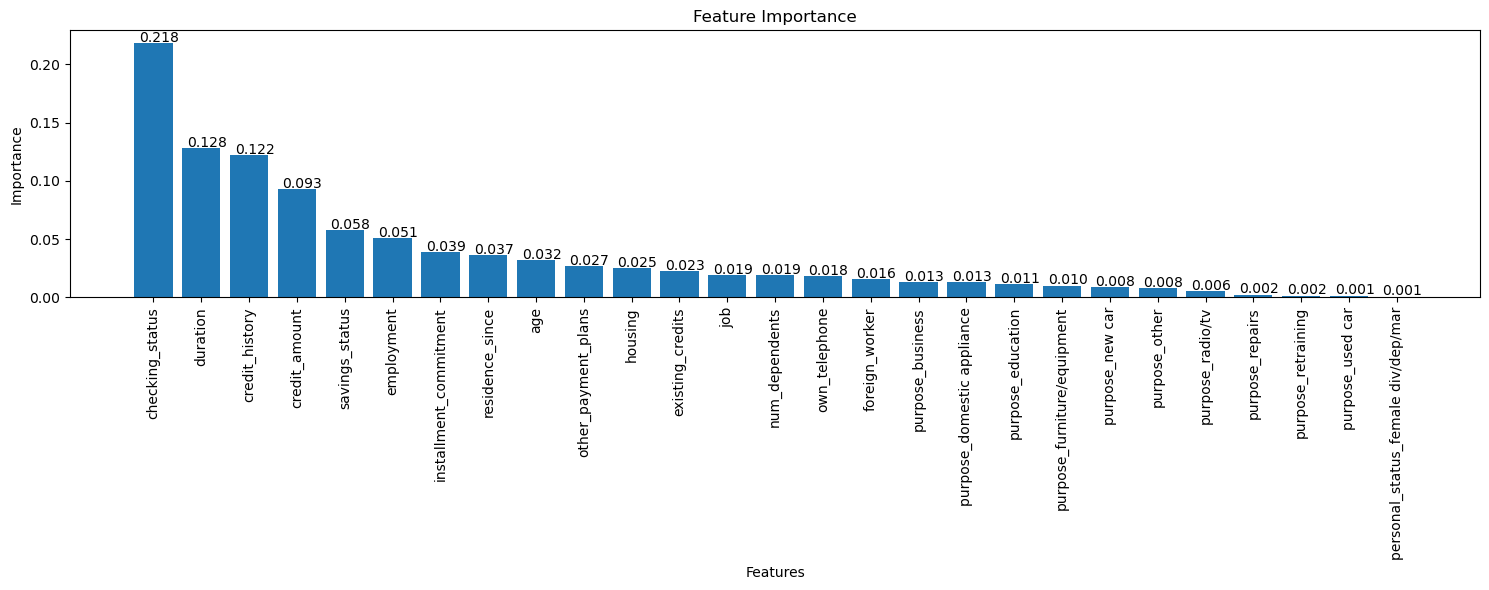

In [124]:
GB=GradientBoostingClassifier(max_depth=10, max_features=None, n_estimators=100)
GB.fit(X_train, y_train)
importance = GB.feature_importances_
# 获取数据集中的特征名称
feature_names = X_train.columns
# 可视化特征重要性
plt.figure(figsize=(15, 6))
plt.bar(range(len(importance)), sorted(importance,reverse=True), tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
# 在每个直方上方添加文本标签，显示高度
for x, y in enumerate(sorted(importance, reverse=True)):
 plt.text(x - 0.3 , y + 0.001, '%.3f' % y)

# 调整子图之间的间距
plt.tight_layout()
plt.show()


上图示了梯度提升树模型中每个特征的重要性，并按照降序排列。从图中可以看出，checking_status是最重要的特征，它的重要性是0.201，远高于其他特征。其次是duration、credit_history和credit_amount，它们的重要性都在0.1左右。

#### 二、 交叉效应
根据上述最重要的四个特征（checking_status， credit_history，savings_status，employment），下面分析它们与class之间的交叉效应，即不同类别的变量对class的分布情况的影响。

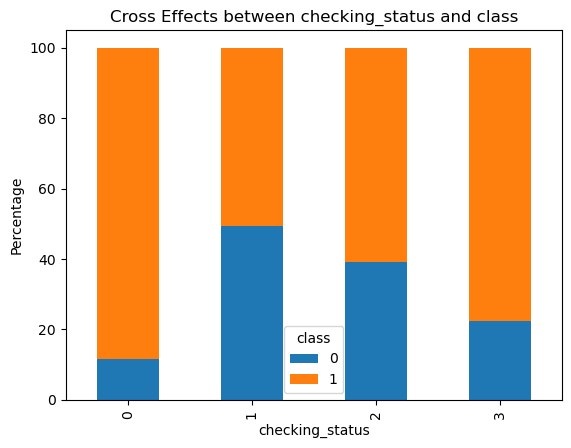

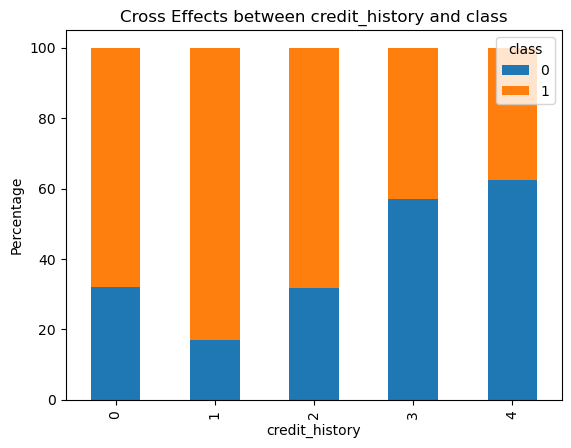

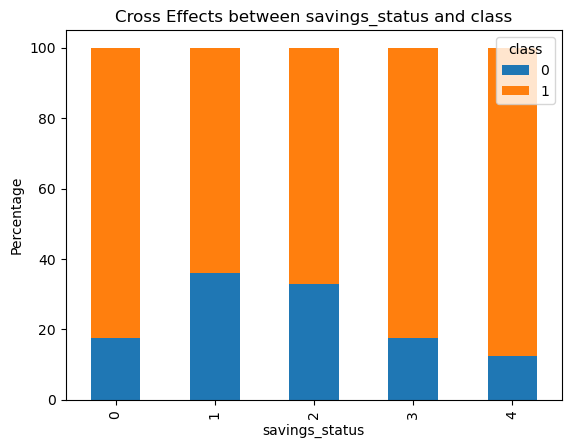

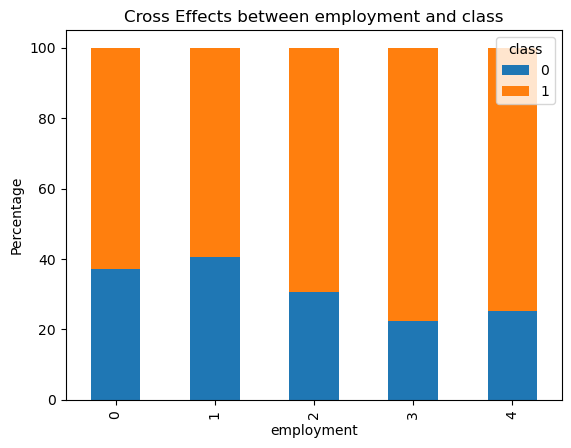

In [119]:

# 定义要分析的变量列表
variables = ['checking_status', 'credit_history', 'savings_status', 'employment']

# 循环生成图表
for var in variables:
    # 使用交叉表计算交叉百分比
    cross_tab = pd.crosstab(data[var], data['class'], normalize='index') * 100

    # 绘制交叉百分比柱状图
    cross_tab.plot(kind='bar', stacked=True)
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.title(f'Cross Effects between {var} and class')
    plt.legend(title='class')
    plt.show()

图1 checking_status表示申请人的支票账户状态，它有4个类别：无账户、余额小于0欧元、余额低于200欧元，余额高于200欧元。从图中可以看出，无账户和小于0欧元的申请人有较高的坏信用风险，而大于200欧元的申请人有较低的坏信用风险。这说明支票账户状态与信用风险呈负相关关系。

图2 credit_history表示申请人的信用历史，它有五个类别：无信用/所有信用已付清、所有信用已付清/延期付款、现有信用/延期付款、严重违约和其他。从图中可以看出，严重违约和现有信用/延期付款的申请人有较高的坏信用风险，而无信用/所有信用已付清和所有信用已付清/延期付款的申请人有较低的坏信用风险。这说明信用历史与信用风险呈正相关关系。

图3 savings_status表示申请人的储蓄账户状态，它有五个类别：无储蓄、小于100欧元、100-500欧元、500-1000欧元和大于1000欧元。从图中可以看出，无储蓄和小于100欧元的申请人有较高的坏信用风险，而大于1000欧元的申请人有较低的坏信用风险。这说明储蓄账户状态与信用风险呈负相关关系。

图4 employment表示申请人的就业状况，它有五个类别：失业、在职分别小于1年、1-4年、4-7年和大于7年。从图中可以看出，失业和在职小于1年的申请人有较高的坏信用风险，而大于7年的申请人有较低的坏信用风险。这说明就业状况与信用风险呈负相关关系。

#### 三、 箱线图

下图反映了不同目标变量类别（class：good/bad）对两个不同特征（duration，credit_amount）的分布情况的影响。duration表示申请人的贷款期限，单位是月。

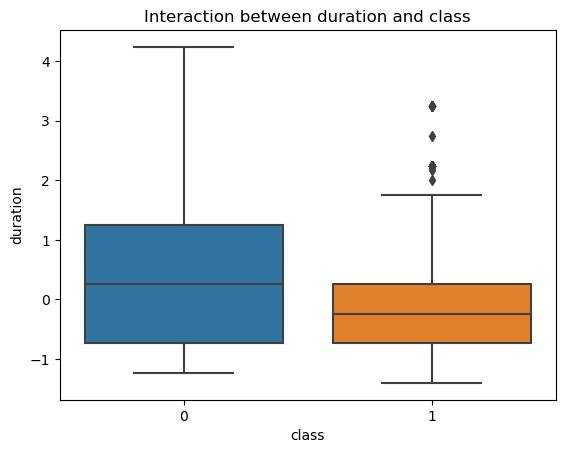

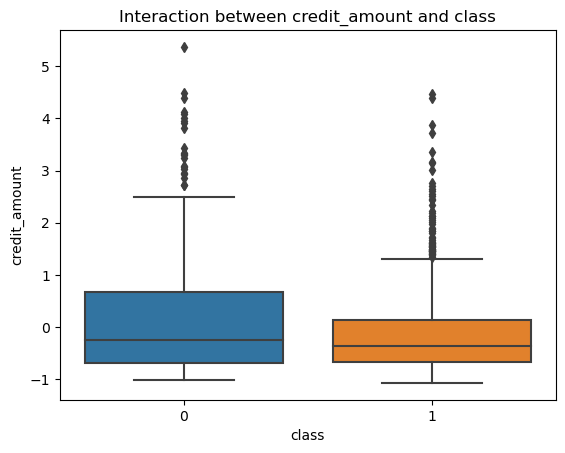

In [120]:
# 绘制箱线图观察重要数值型特征与分类目标之间的关系
variables = ['duration', 'credit_amount']

# 循环生成图表
for var in variables:
    sns.boxplot(x='class', y=var, data=data)
    plt.xlabel("class")
    plt.ylabel(var)
    plt.title(f'Interaction between {var} and class')
    plt.show()

从图1中可以看出，坏信用风险的申请人（class=1）的贷款期限分布比好信用风险的申请人（class=0）更广泛，也更偏向于较长的期限。这说明贷款期限与信用风险呈正相关关系。

图2中credit_amount表示申请人的贷款金额，单位是马克。从图4-12中可以看出，坏信用风险的申请人（class=1）的贷款金额分布比好信用风险的申请人（class=0）更广泛，也更偏向于较高的金额。这说明贷款金额与信用风险呈正相关关系。


### 五、 总结

#### （一）算法比较

**GradientBoostingClassifier**和**RandomForestClassifier**都是基于决策树的集成学习方法，实验过程中发现它们的区别如下：

核心思想
- GradientBoostingClassifier是一种**提升**方法，它通过迭代地拟合残差的负梯度来优化任意可微分的损失函数。
- RandomForestClassifier是一种**随机森林**方法，它通过对多个独立的决策树进行平均或投票来降低方差。
- GradientBoostingClassifier是一种**串行**的算法，每一棵树都依赖于前一棵树的结果。
- RandomForestClassifier是一种**并行**的算法，每一棵树都可以独立地训练。

超参数
- GradientBoostingClassifier主要通过调整学习率、子采样比例、正则化项等参数来控制拟合过程。
- RandomForestClassifier主要通过调整树的数量、最大深度、最小叶子节点数等参数来控制拟合过程。

速度：
- GradientBoostingClassifier通常需要更多的时间和内存来训练和预测，因为它需要多次迭代和梯度计算。
- RandomForestClassifier通常比较快速和节省内存，因为它只需要一次训练和预测。

对样本扰动敏感度：
- RandomForestClassifier对类别不平衡的数据更敏感，出现类别不平衡需要进行处理后再使用随机森林。

#### （二）算法改进方向

- 特征筛选

根据**特征重要性排序图**，可以看到有一些特征对分类的贡献非常微弱，可以考虑再次进行特征筛选，再做分类，可以加快模型拟合的速度。

- 超参数调优

除了网格搜索，还可以使用**贝叶斯优化**的方法来进行调优。

- 类别不平衡

除了正则化的方法，还可以通过**重采样**的方式进行类别平衡。